In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
# chargement du dataset
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df['petal_length']
y=df['sepal_width']

In [6]:
X

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

In [7]:
y

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [8]:
polynomial_converter = PolynomialFeatures(degree=4)

In [9]:
# Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X.
# Puis il "transforme" et sort les nouvelles données polynomiales.
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.
#reshape(1, -1) if it contains a single sample.
#
X=X.values.reshape(-1, 1)


In [10]:
# Le convertisseur s'adapte aux données, dans ce cas, il lit chaque colonne X.
# Puis il "transforme" et sort les nouvelles données polynomiales.
poly_features = polynomial_converter.fit_transform(X) 

In [11]:
poly_features.shape

(150, 5)

In [12]:
X[0]

array([1.4])

In [13]:
poly_features[0]

array([1.    , 1.4   , 1.96  , 2.744 , 3.8416])

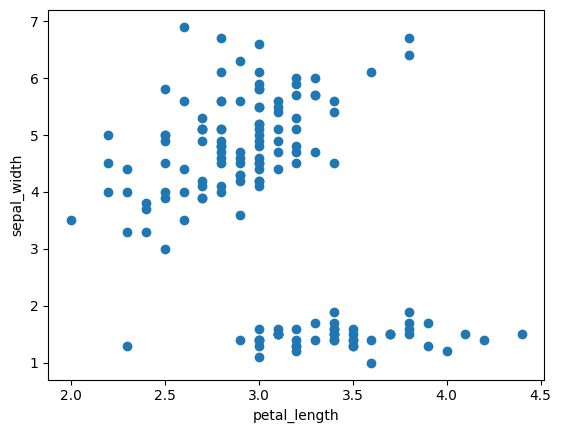

In [14]:
plt.plot(y,X,'o')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.show()

In [15]:
X.shape

(150, 1)

In [16]:
X[0]

array([1.4])

In [17]:
poly_features[0]

array([1.    , 1.4   , 1.96  , 2.744 , 3.8416])

In [18]:
# Spliting the data
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [19]:
model = LinearRegression()
#model = LinearRegression(fit_intercept=True)

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)
predictions=model.predict(poly_features)

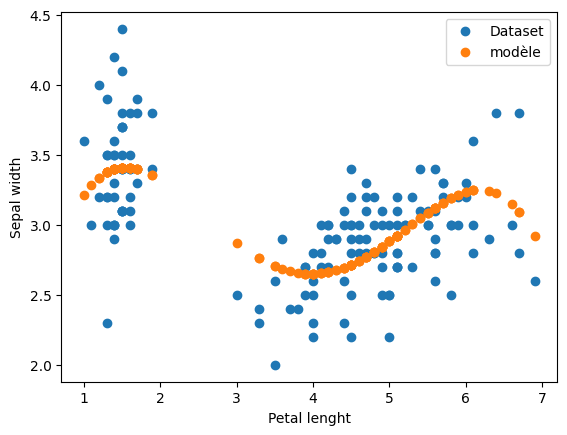

In [22]:
plt.plot(df['petal_length'], df['sepal_width'],'o', label='Dataset')
plt.plot(df['petal_length'], predictions,'o', label='modèle')
plt.xlabel('Petal lenght')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [23]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [24]:
MAE

0.28766214343601076

In [25]:
MSE

0.12631197337292652

In [26]:
RMSE

0.35540395801527946

In [27]:
# ERREUR D'ENTRAÎNEMENT PAR DEGRÉ
train_rmse_errors = []
# ERREUR DE TEST PAR DEGRÉ
test_rmse_errors = []

for d in range(1,10):
    
    # CRÉER DATA SET POLY POUR DEGRÉ "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=True)
    poly_features = polynomial_converter.fit_transform(X)
    
    # DIVISER CE NOUVEAU DATA SET POLY
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # ENTRAÎNER SUR CE NOUVEAU SET POLY
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # PRÉDIRE À LA FOIS SUR TRAIN ET SUR TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calcul des erreurs
    
    # Erreurs sur Training Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Erreurs sur test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Ajoutez (append) les erreurs à des listes pour les tracer ultérieurement
    
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

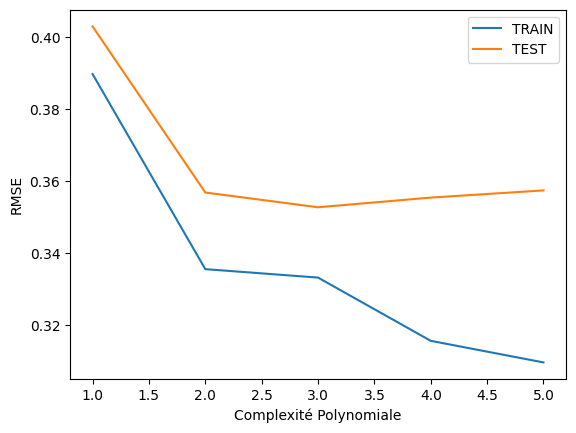

In [28]:
# Affichage de l'erreur RMSE en fonction du degré du modèle polynomial: de degré 1 à 5
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend();

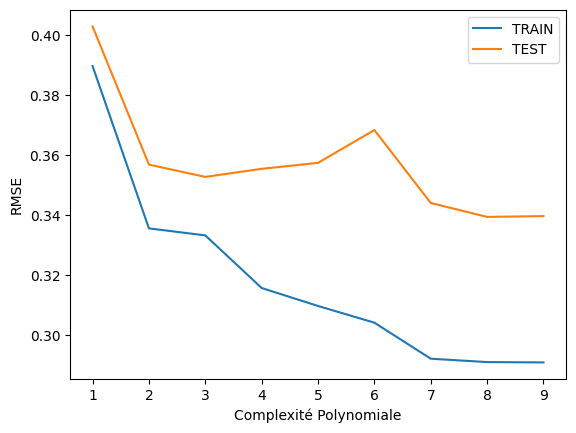

In [29]:
# Affichage de l'erreur RMSE en fonction du degré du modèle polynomial: de degré 1 à 9
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Complexité Polynomiale")
plt.ylabel("RMSE")
plt.legend()

In [30]:
train_predictions

array([3.28431888, 3.21455994, 2.65401315, 3.40962832, 2.87233744,
       2.6512094 , 3.39954544, 2.92256183, 3.39857195, 2.76054652,
       3.18903046, 2.65010718, 3.40962832, 3.40962832, 2.74380985,
       3.39857195, 2.71722476, 2.92284327, 3.12380459, 2.71722476,
       3.33737847, 2.71722476, 3.40962832, 2.92256183, 3.15843302,
       2.71722476, 3.04632195, 2.74380985, 3.23392834, 3.37496639,
       3.39857195, 3.40962832, 2.74380985, 3.39857195, 3.40951252,
       3.40951252, 3.24598642, 3.40962832, 3.39954544, 2.80757207,
       2.80757207, 3.40951252, 3.33737847, 3.23392834, 3.24598642,
       2.88238005, 3.35506032, 2.70538719, 3.21455994, 3.39857195,
       3.39857195, 2.88238005, 3.12380459, 3.40962832, 2.65010718,
       3.39954544, 2.71722476, 3.09338648, 3.37496639, 3.12380459,
       2.77406543, 2.84385418, 3.15843302, 3.40962832, 3.04632195,
       3.39857195, 2.65401315, 2.92256183, 3.37496639, 2.65010718,
       3.39857195, 3.12380459, 2.77406543, 3.15246842, 3.39857

In [31]:
test_predictions

array([3.39857195, 3.37496639, 3.40951252, 3.18903046, 2.77406543,
       2.84385418, 2.71722476, 2.65010718, 2.88238005, 3.39857195,
       2.96375552, 3.40962832, 3.40962832, 3.09338648, 2.84385418,
       2.6764631 , 2.65401315, 2.6628447 , 3.37496639, 3.12380459,
       2.65734625, 3.40962832, 2.69467345, 2.69467345, 2.6764631 ,
       2.68454904, 2.76054652, 2.92256183, 3.40951252, 3.37496639,
       3.18903046, 2.65010718, 3.086126  , 2.6512094 , 3.086126  ,
       2.71722476, 2.77406543, 2.6628447 , 2.6628447 , 3.24598642,
       3.40962832, 3.21424218, 3.40951252, 2.88238005, 2.71722476])

In [32]:
r2_test = r2_score(y_test, test_predictions)
r2_test

0.3731761356658919

In [33]:
r2_train = r2_score(y_train, train_predictions)
r2_train

0.4407943619197616

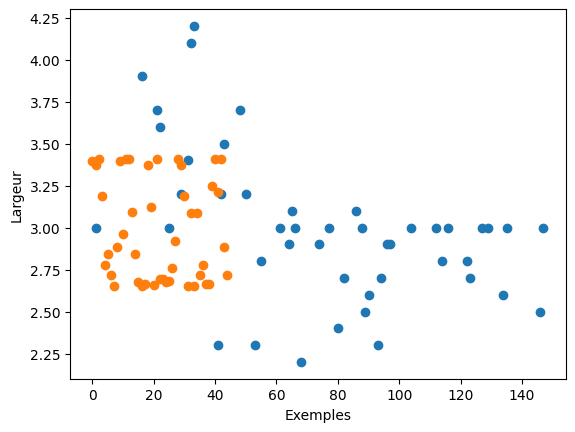

In [34]:
plt.plot(y_test,'o',label='y_test')
plt.plot(test_predictions,'o', label='y_tes_pred')
plt.xlabel('Exemples')
plt.ylabel('Largeur')
plt.legend
plt.show()